# Micro-Credit Defaulter Model

**INTRODUCTION**: A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.


**OBJECTIVE:** We have a Dataset of more than 2Lac sample/entries about customers who Loaned from their Mobile service provider and their repayment information.

Our objective is to build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

**IDENTIFYING TYPE:** We have a target variable 'Label' which consist of data values '1' and '0',that says whether the customer is a Transactor or Defaulter. This is ideally a case of Binary Classification as per my initial hyothesis. So we would be using Classification Algorithms to train the model and metrics to evaluate it.

### IMPORTING LIBRARIES

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling
from sklearn import metrics

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

### LOADING THE DATA 

In [62]:
# Loading data and converting to DataFrame
df= pd.read_csv("F1data_file.csv")
test= pd.DataFrame(data=df)

# Displaying first 5 rows
df.head(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016


In [63]:
# Lets have some basic insights about the data.
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [64]:
# Lets fnd how many number of columns we have.
len(df.columns)

37

In [65]:
#It help us to undesrtand how much instances we have, which is the row number
# and the columns Number tell us about the feature in the data.
df.shape

(209593, 37)

So we have a huge dataset of 2,09,593 samples and 37 columns.

In [66]:
# Datatypes of columns
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

Except Telecom circle and Date all other columns are numeric datatypes.

In [67]:
# Knowing more about the data by analysing the Statistical info.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,104797.000000,60504.431823,1.000000,52399.000,104797.000000,157195.00,209593.000000
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755200
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377700
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809400
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000


***OBSERVATIONS:***   
1. Column unnamed is urrelevant as the data is indexed by default.  
2. There are no null values in the database.  
3. 'Label is our target variable which says whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}.  
3. 'msisdn' is the mobile number of user which is again irrelevant for the modelling.  
4. Then we have 'aon' which is age on network in days which is min 48 days to max 999860 days.  
5. 'daily_decr30' is the Daily amount spent from main account, averaged over last 30 days.  
Likewise We have 37 attributes to evaluate one by one to get more insights.

In [68]:
# Checking target variable.
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [69]:
# percentage of Defaulters and non-defaulters in column:label
df['label'].value_counts(normalize=True) * 100

1    87.517713
0    12.482287
Name: label, dtype: float64

**Defaulters      - 12.48%**  
**Non-Defaulters - 87.51%**  
The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
we can use various techniques to treat imbalanced classes such as- 
Random under-sampling  
Random over-sampling  
NearMiss  

In [70]:
# We have 2 categorical variables to deal with before proceeding to visualization.
# pcircle is the telecom circle.
df.pcircle.value_counts()

UPW    209593
Name: pcircle, dtype: int64

So Luckily we have only one telecom circle under which all the mobile connections are registered.  
A telecom circle is normally covers an entire state of Indonesia. So we can avoid this column later.

In [71]:
# I have mentioned mobile number is irrelevant, but lets see if there is any duplicate mobile nos.
len(pd.unique(df["msisdn"]))

186243

so we have total sample numbers 209593, and only 186243 are unique ie. 23,350 duplicate mobile numbers.  
This consists of 11% of data and we cannot delete these as we cannot lose data more than7-8%.

### EXPLORATORY DATA ANALYSIS

EDA comprises data visualization, data extraction and preprocessing.

In [72]:
# Checking null values
df.isnull().sum()
# There are no null values in the dataset.

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

**DATA VISUALIZATION**

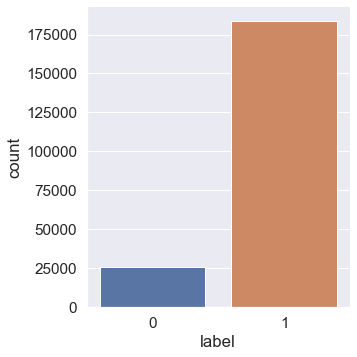

In [73]:
# Plotting target variable.
sns.catplot(x='label', data=df, kind='count')
plt.show()

In [74]:
# Added the columns which we require for visualizing to variable data_cols.
data_cols=["label","sumamnt_ma_rech90","daily_decr90","sumamnt_ma_rech30","daily_decr30","rental90","medianamnt_ma_rech30","last_rech_amt_ma","medianamnt_ma_rech90","rental30","medianmarechprebal30","aon","medianmarechprebal90","amnt_loans90","cnt_da_rech30","amnt_loans30","cnt_ma_rech90","cnt_ma_rech30","last_rech_date_ma","fr_ma_rech30","fr_ma_rech90"]
# Indexing the columns in variable data_cols
list(enumerate(data_cols))

[(0, 'label'),
 (1, 'sumamnt_ma_rech90'),
 (2, 'daily_decr90'),
 (3, 'sumamnt_ma_rech30'),
 (4, 'daily_decr30'),
 (5, 'rental90'),
 (6, 'medianamnt_ma_rech30'),
 (7, 'last_rech_amt_ma'),
 (8, 'medianamnt_ma_rech90'),
 (9, 'rental30'),
 (10, 'medianmarechprebal30'),
 (11, 'aon'),
 (12, 'medianmarechprebal90'),
 (13, 'amnt_loans90'),
 (14, 'cnt_da_rech30'),
 (15, 'amnt_loans30'),
 (16, 'cnt_ma_rech90'),
 (17, 'cnt_ma_rech30'),
 (18, 'last_rech_date_ma'),
 (19, 'fr_ma_rech30'),
 (20, 'fr_ma_rech90')]

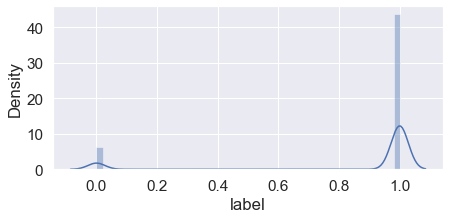

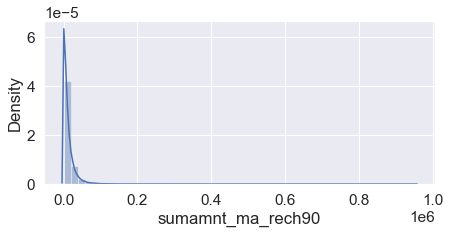

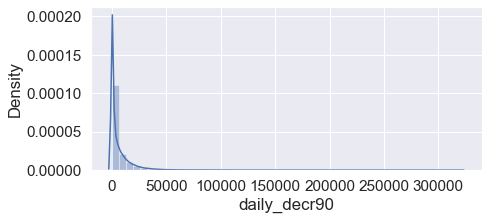

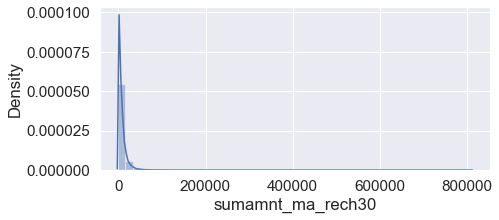

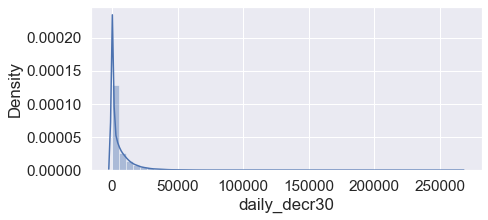

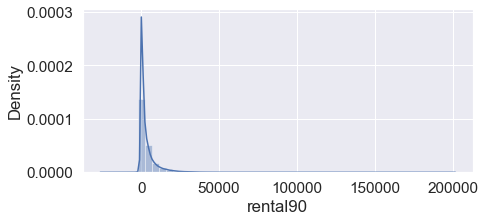

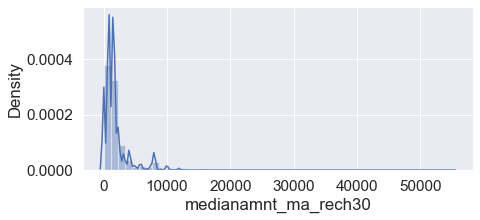

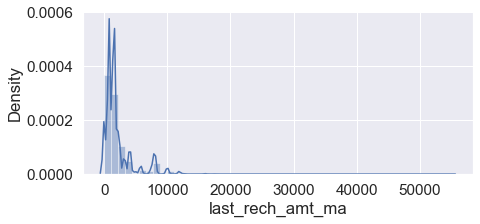

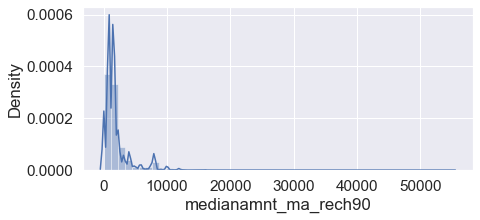

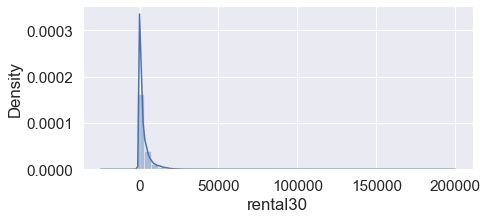

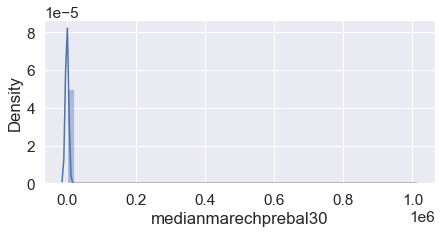

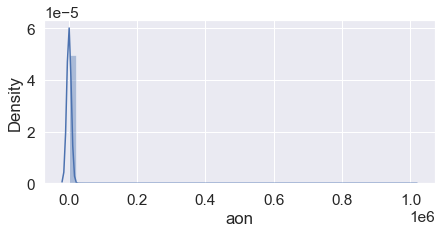

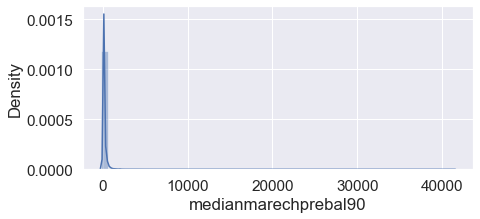

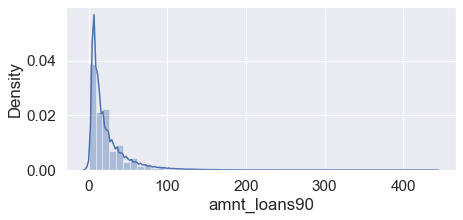

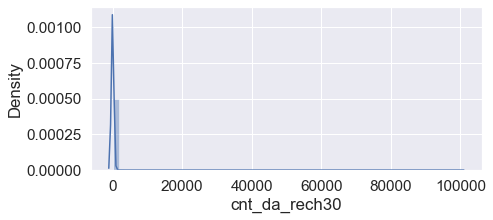

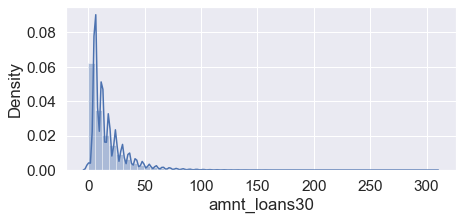

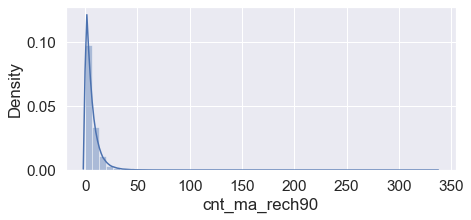

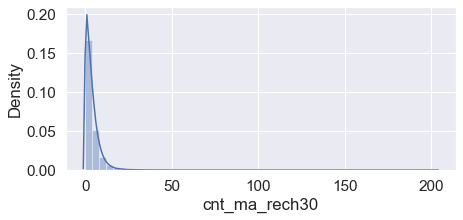

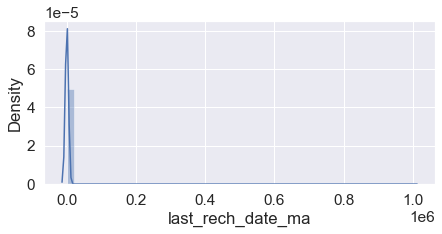

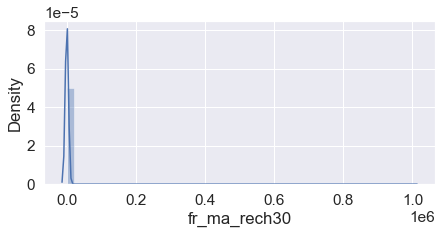

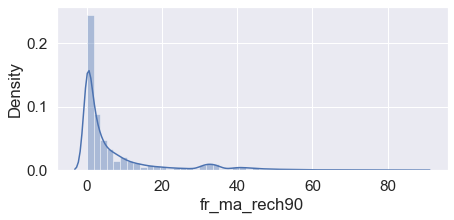

In [75]:
# Distribution of individual varables.
for column in data_cols:
    plt.figure(figsize=(7,3))
    sns.distplot(df[column])

<AxesSubplot:>

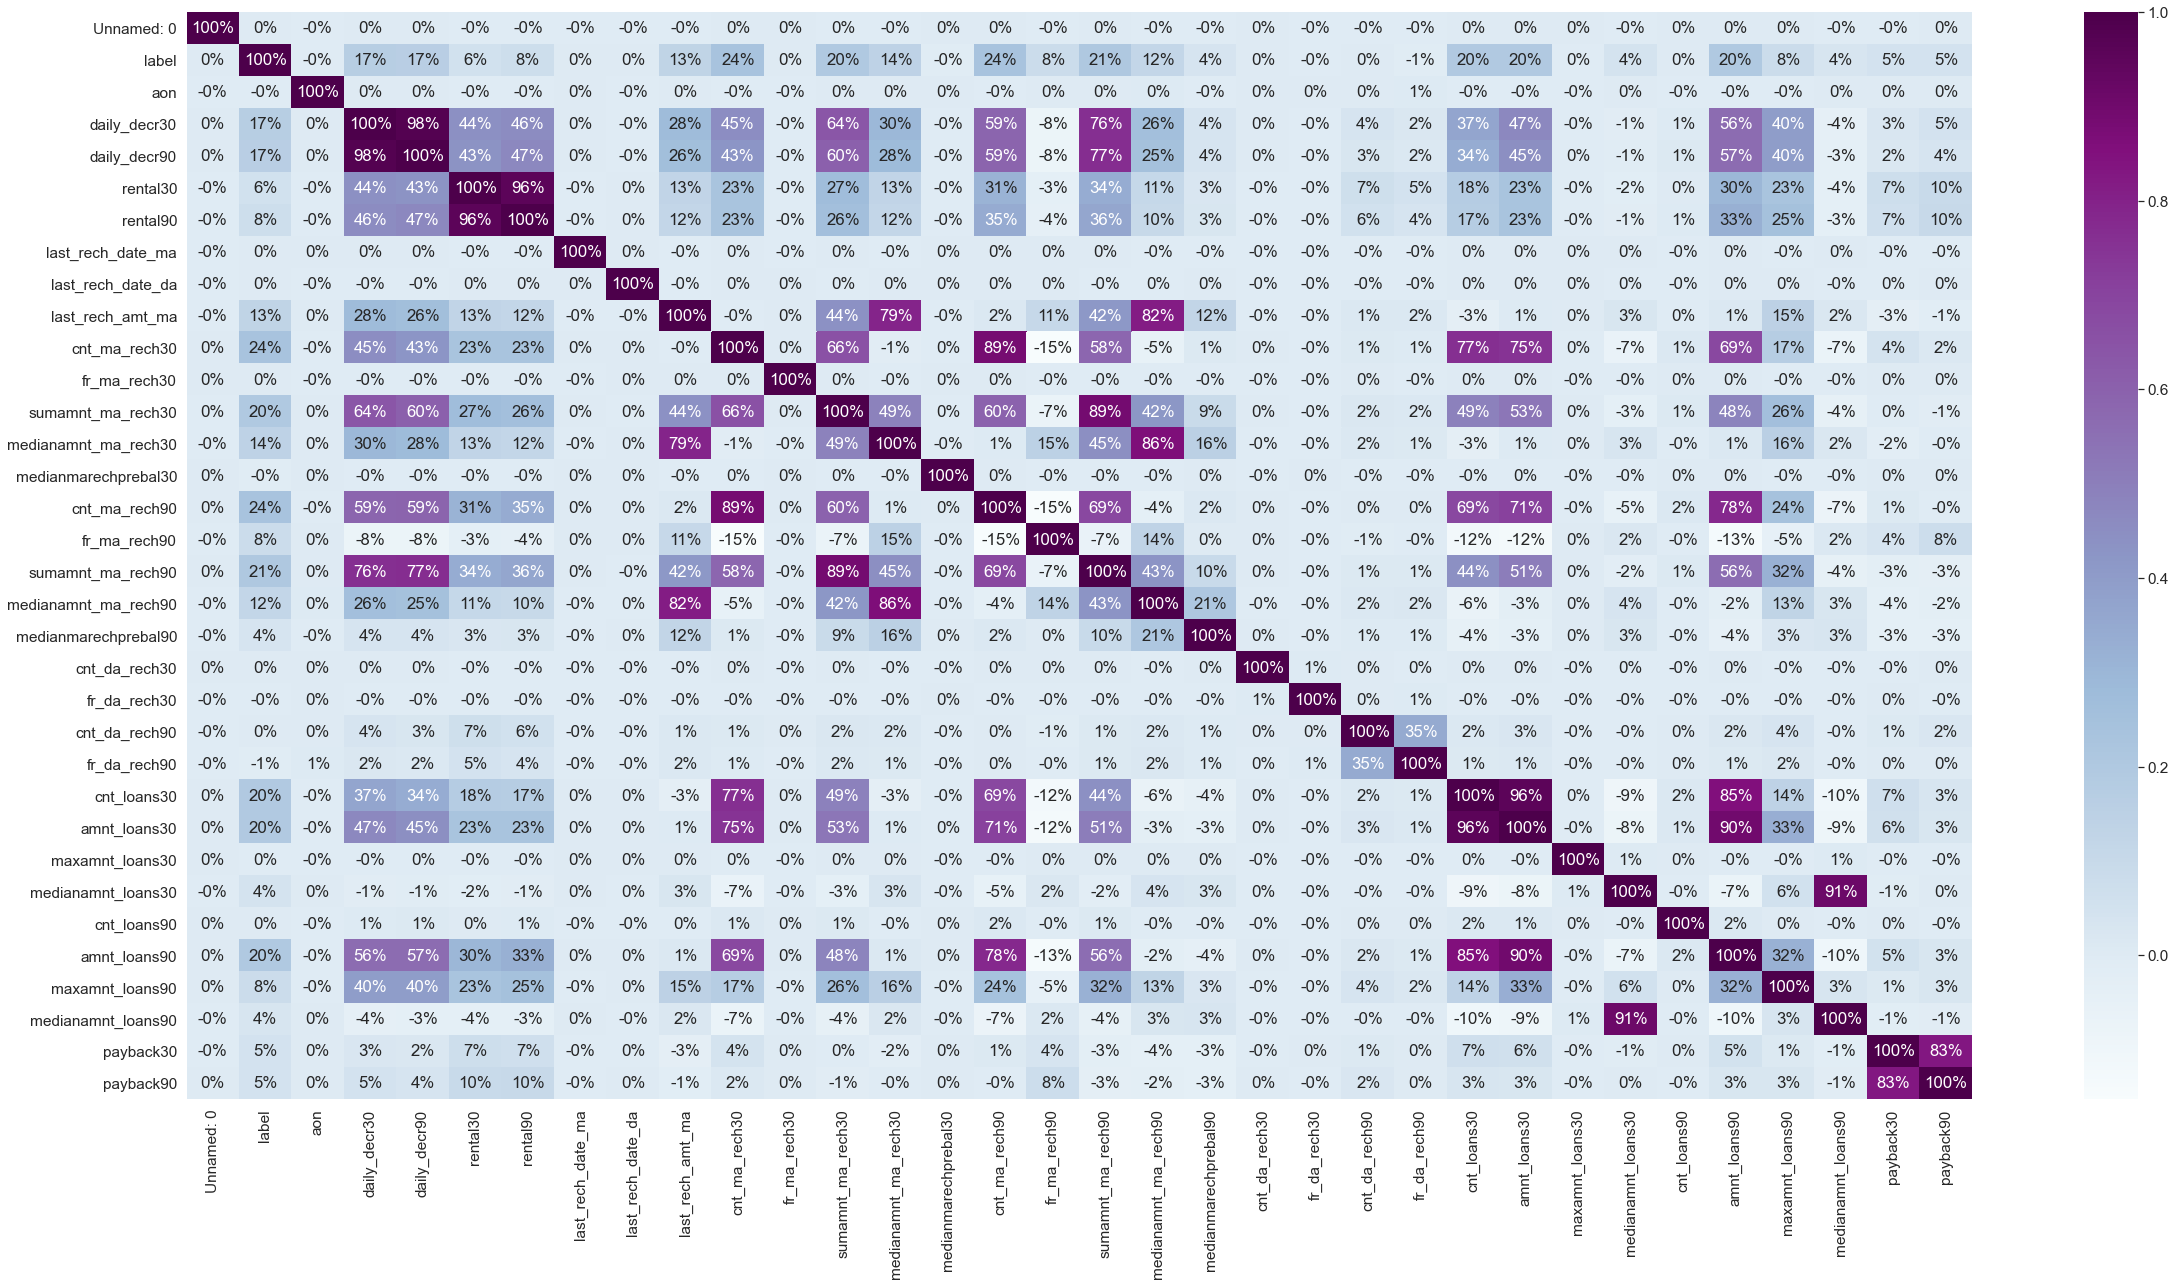

In [76]:
#Heatmap to know correlation between attributes.
correlations = df.corr()
plt.figure(figsize=(40,20))
sns.set(font_scale=1.4)
sns.heatmap(correlations, data=df, annot=True, fmt='.0%',cmap="BuPu")

Analysing the heatmap,  
1. Target variable 'label' has no correlation more than 30% with any features.  
2. 'label' has 24% correlation with count of main account got recharged in last 30 days and 90 days.  

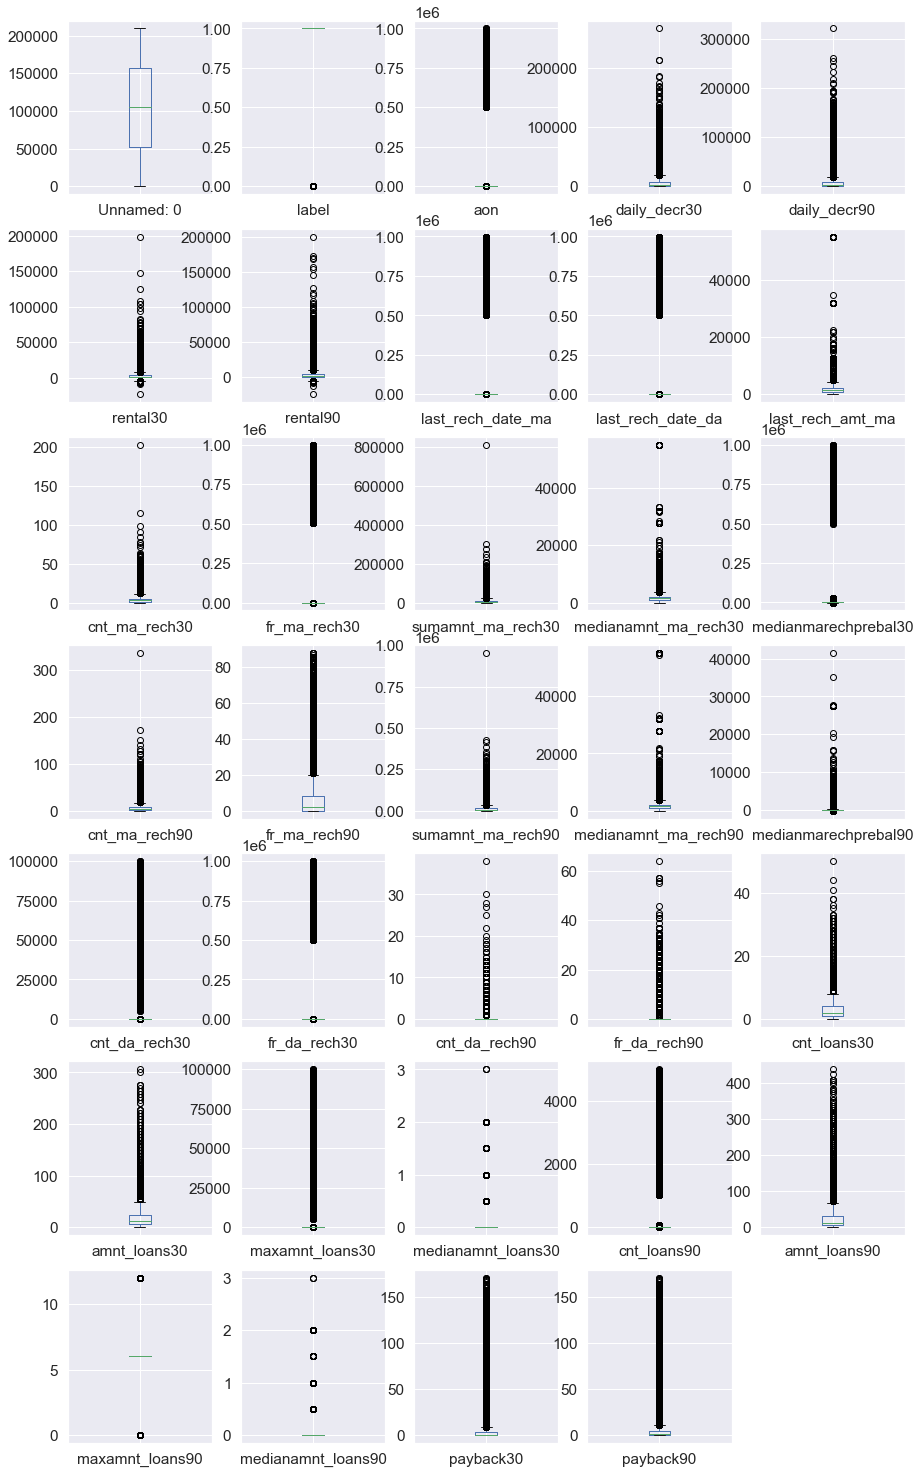

In [77]:
# Checking outliers with boxplot.
df.plot(kind='box', figsize=(15,30), layout =(8,5), sharex=False, subplots=True)
plt.show()

In [20]:
# Checking skewness
# Skewness measures the symmetry of a distribution. It shows how much the distribution deviates from a normal distribution.
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

We have positively skewed data. ie. outliers are skewed to the right and data stacked upon the left.  
we can use Log Transformation to transform outliers.

### FEATURE ENGINEERING

In [21]:
# Dropping unnamed as its irrelevant.
# Dropping msidn as its not helping for predicton.
# Dropping the pcircle as it contains one value in all the rows so it won't help in training data.
# Converting pdate in date format as its in object datatype
df.drop(['Unnamed: 0','msisdn','pcircle','pdate'],axis=1,inplace=True)
#data["pdate"] = pd.to_datetime(data["pdate"])

In [22]:
# Replacing all non-numerals of column 'aon' with mode value.
mode=df['aon'].mode()
df['aon']=df['aon'].fillna(95)
mode

0    95.0
dtype: float64

In [23]:
df['daily_decr30']=df['daily_decr30'].fillna(0.0)
df['daily_decr90']=df['daily_decr90'].fillna(0.0)
df['rental30']=df['rental30'].fillna(0.0)
df['rental90']=df['rental90'].fillna(0.0)

In [24]:
# Storing column names to a variable so that after normalzation we can restore column names.
store_colnames=[str(i) for i in df.columns]

**NORMALIZATION**


In [25]:
Y =df.label
df.drop('label',axis=1,inplace=True)

In [26]:
scalr=Normalizer()

In [27]:
df=scalr.fit_transform(df)

In [28]:
df=pd.DataFrame(df,columns= store_colnames[1:])
df.head(5)

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.040558,0.455545,0.457051,0.032824,0.038789,0.000298,0.0,0.229483,0.000298,0.003131,...,0.000298,0.001789,0.000895,0.0,0.000298,0.001789,0.000895,0.0,0.004324,0.004324
1,0.032192,0.548083,0.548207,0.166896,0.166896,0.000904,0.0,0.261653,0.000045,0.000000,...,0.000045,0.000543,0.000543,0.0,0.000045,0.000543,0.000543,0.0,0.000000,0.000000
2,0.127283,0.332602,0.332602,0.214152,0.214152,0.000714,0.0,0.366148,0.000238,0.000000,...,0.000238,0.001427,0.001427,0.0,0.000238,0.001427,0.001427,0.0,0.000000,0.000000
3,0.143966,0.012681,0.012681,0.095233,0.095233,0.024492,0.0,0.565709,0.000000,0.000000,...,0.001195,0.007168,0.003584,0.0,0.001195,0.007168,0.003584,0.0,0.000000,0.000000
4,0.030319,0.004822,0.004822,0.035182,0.035182,0.000128,0.0,0.073925,0.000224,0.000064,...,0.000224,0.001345,0.000192,0.0,0.000224,0.001345,0.000192,0.0,0.000075,0.000075


In [29]:
# Define the independent and dependent variable
x=df

### MODELLING

**TRAIN TEST SPLIT**

In [30]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state = 0)

**1. LOGISTC REGRESSION**

In [31]:
# logistic regression object 
lr = LogisticRegression(solver='lbfgs', max_iter=400) 
  
# train the model on train set 
lr.fit(x_train, Y_train) 
lr.score(x_train, Y_train)
  
predictions = lr.predict(x_test) 
  
print("Confusion Matrix:",confusion_matrix(Y_test, predictions))
print("Classification Report:",classification_report(Y_test, predictions))
print("Accuracy score:",accuracy_score(Y_test, predictions)) 

Confusion Matrix: [[  937  6965]
 [  721 54255]]
Classification Report:               precision    recall  f1-score   support

           0       0.57      0.12      0.20      7902
           1       0.89      0.99      0.93     54976

    accuracy                           0.88     62878
   macro avg       0.73      0.55      0.56     62878
weighted avg       0.85      0.88      0.84     62878

Accuracy score: 0.8777632876363752


In [32]:
# Cross Validated score for Logistic Regression
scr1= cross_val_score( lr,x,Y, cv=10)
print("Cross Validated score for LR is:",scr1.mean())

Cross Validated score for LR is: 0.8786886998389075


**SAMPLING**

In [36]:
#pip install imblearn -U

In [37]:
# pip install -U imbalanced-learn --user

In [35]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0))) 
  

sm = SMOTE(random_state = 0) 
x_train_res, Y_train_res = sm.fit_sample(x_train, Y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))


Before OverSampling, counts of label '1': 128455
Before OverSampling, counts of label '0': 18260 

After OverSampling, the shape of train_X: (256910, 32)
After OverSampling, the shape of train_y: (256910,) 

After OverSampling, counts of label '1': 128455
After OverSampling, counts of label '0': 128455


In [39]:
# Remodelling after prediction
lr1 = LogisticRegression(solver='lbfgs', max_iter=400) 
lr1.fit(x_train_res, Y_train_res) 
lr1.score(x_train_res, Y_train_res) 
predictions = lr1.predict(x_test)

In [40]:
print("Confusion Matrix:",confusion_matrix(Y_test, predictions))
print("Classification Report:",classification_report(Y_test, predictions))
print("Accuracy score:",accuracy_score(Y_test, predictions)) 

Confusion Matrix: [[ 5825  2077]
 [13984 40992]]
Classification Report:               precision    recall  f1-score   support

           0       0.29      0.74      0.42      7902
           1       0.95      0.75      0.84     54976

    accuracy                           0.74     62878
   macro avg       0.62      0.74      0.63     62878
weighted avg       0.87      0.74      0.78     62878

Accuracy score: 0.7445688476096568


**ROC-AUC CURVE FOR LR**

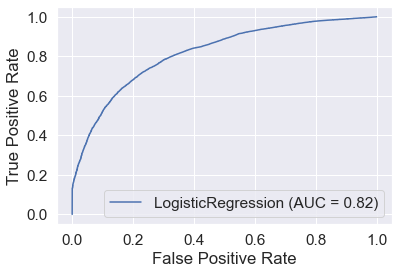

In [44]:
metrics.plot_roc_curve(lr1, x_test, Y_test) 
plt.show()

**2. DECISIONTREE CLASSIFIER**

In [47]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train_res, Y_train_res) 
dtc.score(x_train_res, Y_train_res) 
prediction1 = dtc.predict(x_test)

In [48]:
print("Confusion Matrix:",confusion_matrix(Y_test, prediction1))
print("Classification Report:",classification_report(Y_test, prediction1))
print("Accuracy score:",accuracy_score(Y_test, prediction1)) 

Confusion Matrix: [[ 4816  3086]
 [ 8191 46785]]
Classification Report:               precision    recall  f1-score   support

           0       0.37      0.61      0.46      7902
           1       0.94      0.85      0.89     54976

    accuracy                           0.82     62878
   macro avg       0.65      0.73      0.68     62878
weighted avg       0.87      0.82      0.84     62878

Accuracy score: 0.8206526925156653


**ROC-AUC CURVE FOR DTC**

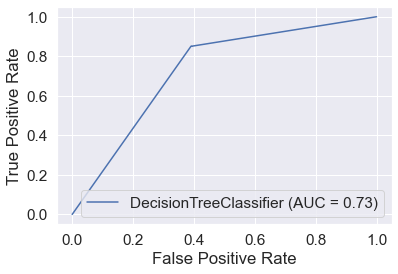

In [50]:
metrics.plot_roc_curve(dtc, x_test, Y_test) 
plt.show()

**RANDOMFOREST CLASSIFIER**

In [57]:
rfc=RandomForestClassifier()
rfc.fit(x_train_res, Y_train_res) 
rfc.score(x_train_res, Y_train_res) 
prediction2 = rfc.predict(x_test)

In [58]:
print("Confusion Matrix:",confusion_matrix(Y_test, prediction2))
print("Classification Report:",classification_report(Y_test, prediction2))
print("Accuracy score:",accuracy_score(Y_test, prediction2))  

Confusion Matrix: [[ 4938  2964]
 [ 4368 50608]]
Classification Report:               precision    recall  f1-score   support

           0       0.53      0.62      0.57      7902
           1       0.94      0.92      0.93     54976

    accuracy                           0.88     62878
   macro avg       0.74      0.77      0.75     62878
weighted avg       0.89      0.88      0.89     62878

Accuracy score: 0.8833932376984001


**ROC-AUC CURVE FOR RFC**

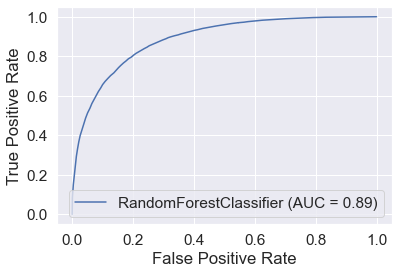

In [59]:
metrics.plot_roc_curve(rfc, x_test, Y_test) 
plt.show()

### SAVING BEST MODEL

In [78]:
import pickle
# save the model to disk
filename = 'finalmodelmicrocredit.pkl'
pickle.dump(rfc,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)    

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)